In [1]:
from candphy.waves import get_signal_radio as gr
from candphy.waves import plot_signal as ps
from candphy.logs import show_console 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [10]:

#getting signals samples from 
#the around of the frequency 99.9Mhz
#(raio from space get is of 3.1Mhz)
s = gr(99.9,freq_rate=3.1)
print('signal radio: \n',s)

Detached kernel driver
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
Exact sample rate is: 3100000.092387 Hz


signal radio: 
 {'freq_center': 99900000.0, 'freq_rate': 3100000.0, 'bytes': 1024, 'order': 1000000.0, 'size_signal': 262144, 'samples': array([-0.01176471-0.00392157j, -0.00392157-0.00392157j,
       -0.00392157+0.02745098j, ...,  0.16078431+0.06666667j,
       -0.16078431+0.11372549j, -0.30196078+0.16078431j]), 'type': 'signal_radio'}


Reattached kernel driver


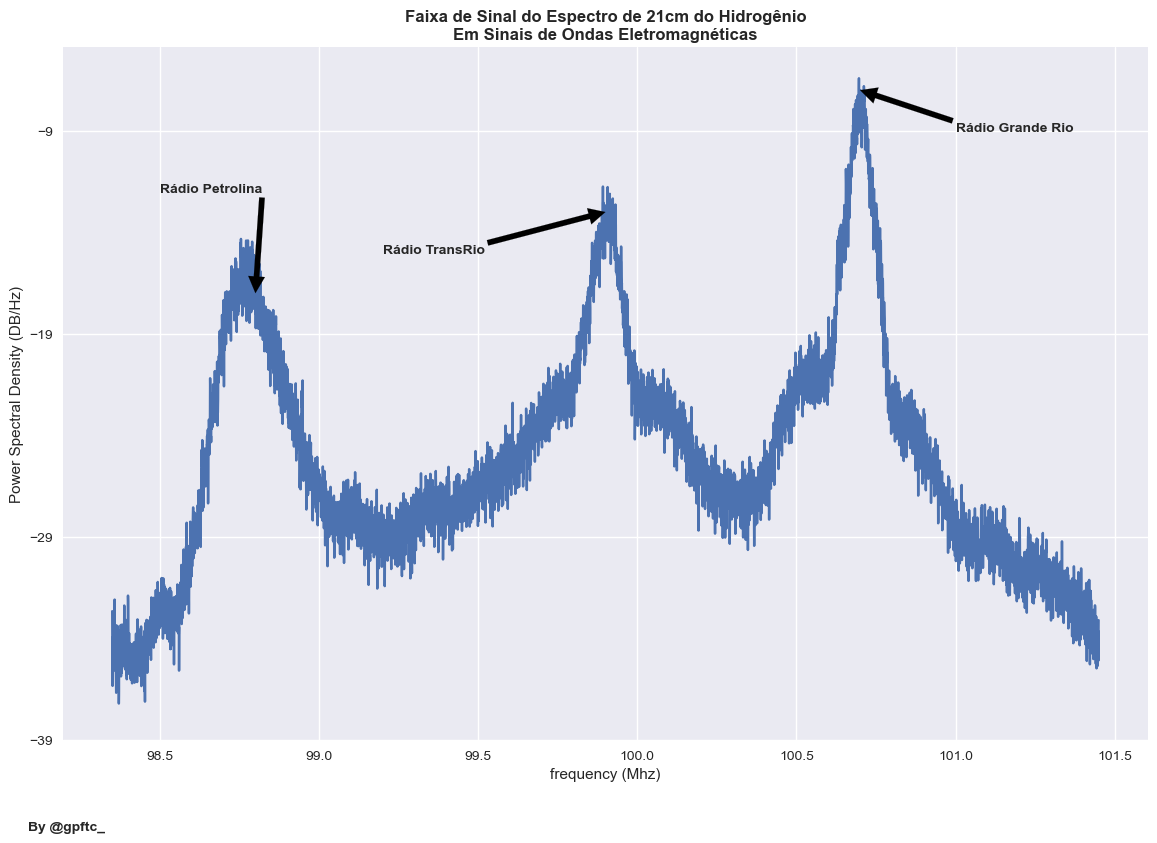

In [19]:
fig,ax = plt.subplots(figsize=(14,9))
plt.style.use('seaborn')
#plotting this signal radio
s['bytes'] = 8192
fig = ps(s,show=False)

plt.title('Faixa de Sinal do Espectro de 21cm do Hidrogênio\nEm Sinais de Ondas Eletromagnéticas',fontweight='bold')
plt.grid()

plt.annotate('Rádio Petrolina',
                 xy=(98.8,-17),xytext=(98.5,-12),
                 size=10,fontweight='bold',
                 arrowprops = dict(facecolor ='black',
                                   lw=.1,
                                      shrink = 0.001))


plt.annotate('Rádio TransRio',
                 xy=(99.9,-13),xytext=(99.2,-15),
                 size=10,fontweight='bold',
                 arrowprops = dict(facecolor ='black',
                                   lw=.1,
                                      shrink = 0.001))


plt.annotate('Rádio Grande Rio',
                  xy=(100.7,-7),xytext=(101.0,-9),
                  size=10,fontweight='bold',
                 arrowprops = dict(facecolor ='black',
                                    lw=.1,
                                       shrink = 0.001))

plt.text(0.1, 0.01,'By @gpftc_', fontsize=10, fontweight='bold', transform=plt.gcf().transFigure)
# ax.axvline(x=1420.45, color='k')
#plt.savefig('signal_radio.png',dpi=900)
plt.show()

In [12]:
wv=s['samples']

In [15]:
np.fft.fft(wv)

array([-231.49803922-204.75294118j,   -6.5436176   +6.0608441j ,
         -9.0303714   +9.30658533j, ...,  -18.51999529  +6.19703436j,
        -11.79381071  +8.15463053j,   -9.98448828 +10.6275957j ])

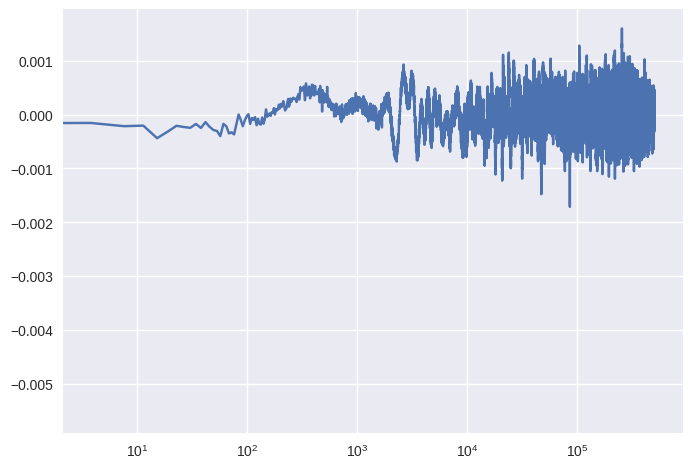

In [33]:
wv_fft = np.fft.fft(wv)
n_samples = len(wv)

amp = 2/n_samples*np.pi*wv_fft
freq = np.fft.fftfreq(n_samples,d=1/1e6)


plt.semilogx(freq[:len(freq)//2],amp[:len(amp)//2])